<a href="https://colab.research.google.com/github/pankaj18/NLP-Projects/blob/master/twitter_sentiment_analysis/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [3]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [4]:
pd.set_option("display.max_colwidth",200)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [6]:
!wget https://raw.githubusercontent.com/pankaj18/NLP-Projects/master/twitter_sentiment_analysis/test_tweets_anuFYb8.csv
!wget https://raw.githubusercontent.com/pankaj18/NLP-Projects/master/twitter_sentiment_analysis/train_E6oV3lV.csv

--2020-08-27 17:32:13--  https://raw.githubusercontent.com/pankaj18/NLP-Projects/master/twitter_sentiment_analysis/test_tweets_anuFYb8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1635543 (1.6M) [text/plain]
Saving to: ‘test_tweets_anuFYb8.csv’

test_tweets_anuFYb8 100%[===================>]   1.56M  8.74MB/s    in 0.2s    

2020-08-27 17:32:13 (8.74 MB/s) - ‘test_tweets_anuFYb8.csv’ saved [1635543/1635543]

--2020-08-27 17:32:14--  https://raw.githubusercontent.com/pankaj18/NLP-Projects/master/twitter_sentiment_analysis/train_E6oV3lV.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
H

In [7]:
ls

sample_data/  test_tweets_anuFYb8.csv  train_E6oV3lV.csv


# Inspect Data

In [8]:
train=pd.read_csv('train_E6oV3lV.csv')
test=pd.read_csv('test_tweets_anuFYb8.csv')

In [9]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [10]:
 test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


Check out non racist/sexist tweets

In [11]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


Check out racist/sexist tweets

In [12]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [13]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [14]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

This is imbalanced dataset

check the length of tweets in train and test dataset and plot histogram for visualization

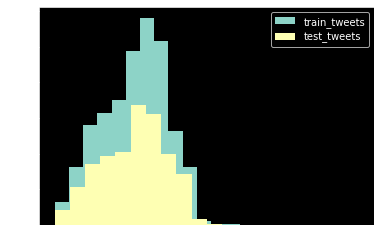

In [15]:
train_len=train['tweet'].str.len()
test_len=test['tweet'].str.len()
plt.hist(train_len,bins=20,label="train_tweets")
plt.hist(test_len,bins=20,label="test_tweets")
plt.legend()

# Clean Data

In [16]:
combi=train.append(test,ignore_index=True)
combi.shape

(49159, 3)

define function to remove unwanted patterns

In [17]:
def remove_pattern(input_txt,pattern):
  r=re.findall(pattern,input_txt)
  for i in r:
    input_txt=re.sub(i,"",input_txt)
  return input_txt


* remove user handles
* remove punctuation, numbers
* remove stopwords and words having lengh less than 3
* word normalization-convert words to their base form

1. Removing twitter handles (@user)

make new column 'tidy_tweet' for cleaned and preprocessed tweets

In [18]:
combi['tidy_tweets']=np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


2. Removing number,special characters and punctuations

replace everything except characters and hashtags with spaces

In [19]:
combi['tidy_tweets']=combi['tidy_tweets'].str.replace("[^a-zA-Z#]"," ")

In [20]:
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


3. Removing short words

In [21]:
combi['tidy_tweets']=combi['tidy_tweets'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


Text Normalization

* Tokenization


* Sremmimg

In [22]:
tokenized_tweets=combi['tidy_tweets'].apply(lambda x:x.split())
tokenized_tweets.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweets, dtype: object

In [23]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweets=tokenized_tweets.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_tweets.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweets, dtype: object

stich these token again

In [24]:
for i in range(len(tokenized_tweets)):
  tokenized_tweets[i]=" ".join(tokenized_tweets[i])
combi['tidy_tweets']=tokenized_tweets
combi.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Visualize Common words in whole dataset

In [25]:
all_words=" ".join([text for text in combi['tidy_tweets']])

In [26]:
from wordcloud import WordCloud

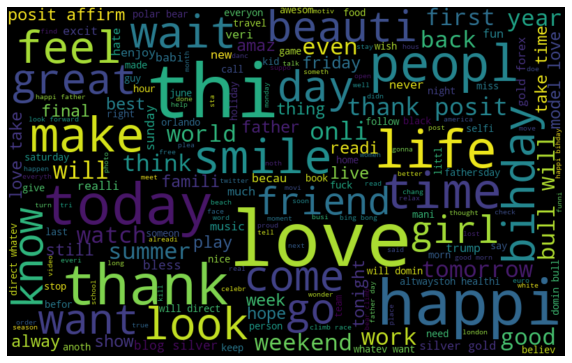

In [27]:
wordcloud=WordCloud(width=800,height=500,random_state=121,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Visualize most common words in non racist/sexist tweets

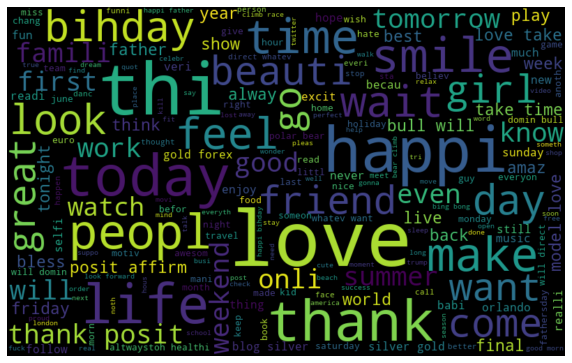

In [28]:
normal_words=" ".join([text for text in combi['tidy_tweets'][combi['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=121,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Visualize most common words in racist/sexist tweets

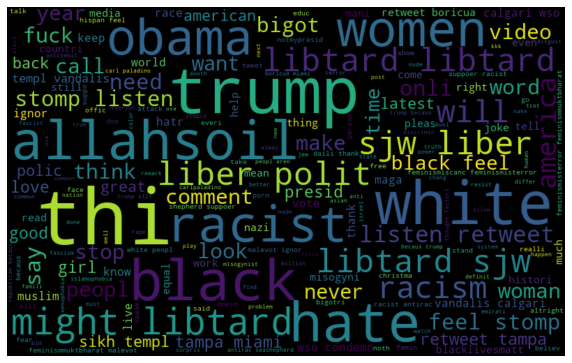

In [29]:
negative_words=" ".join([text for text in combi['tidy_tweets'][combi['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=121,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# understanding impact of hashtags on tweet sentiment

hashtags shows current trend. we will use two lists for non racist/sexist tweets and racist/sexist tweets

In [30]:
# function to collect hashtags
def hashtag_extract(x):
  hashtags=[]
  #loop over words in tweets
  for i in x:
    ht=re.findall(r"#(\w+)",i)
    hashtags.append(ht)
  return hashtags
#extracting hashtags from non racist/sexist tweets
ht_regular=hashtag_extract(combi['tidy_tweets'][combi['label']==0])

#extracting hashtags from racist/sexist tweets
ht_negative=hashtag_extract(combi['tidy_tweets'][combi['label']==1])

In [31]:
#ht_regular

In [32]:
#ht_negative

In [33]:
ht_regular=sum(ht_regular,[])
ht_negative=sum(ht_negative,[])

# Non racist/sexist tweets

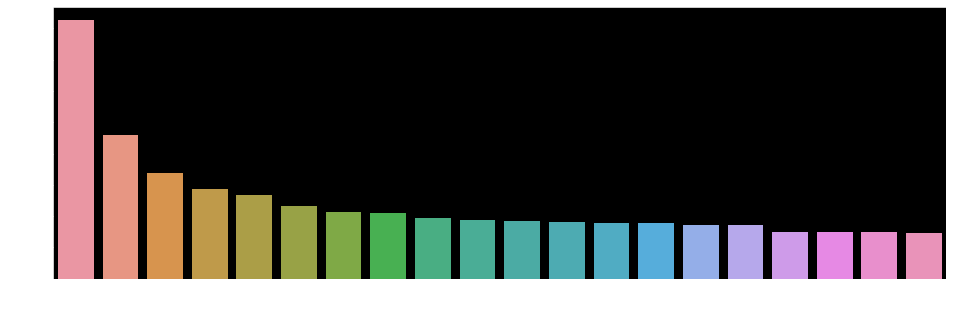

In [34]:
a=nltk.FreqDist(ht_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
#selecting top 20 most frquent hashtags
d=d.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x="Hashtag",y="Count")
ax.set(ylabel="Count")
plt.show()

# Racist/sexist tweets

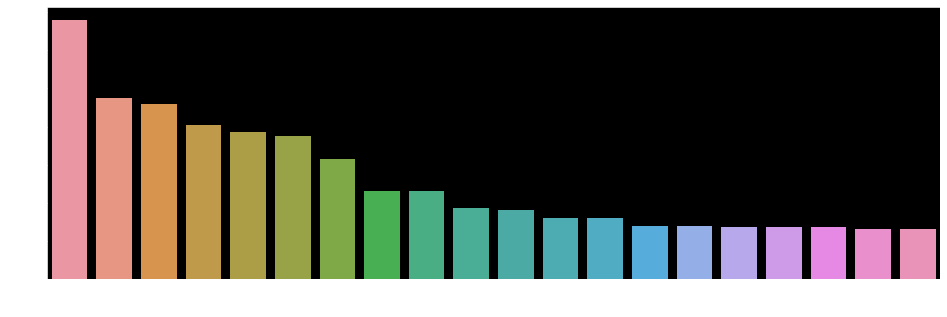

In [35]:
b=nltk.FreqDist(ht_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
#selecting top 20 most frquent hashtags
e=e.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x="Hashtag",y="Count")
ax.set(ylabel="Count")
plt.show()

# Bag-of-words features

In [36]:
bow_vectorizer=CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(combi['tidy_tweets'])
bow.shape

(49159, 1000)

# TF-IDF Features

In [37]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweets'])
tfidf.shape

(49159, 1000)

# Word2Vec Features

In [75]:
tokenized_tweet=combi['tidy_tweets'].apply(lambda x:x.split())
model_w2v=gensim.models.Word2Vec(tokenized_tweet,
                                  size=200,# desired number of features
                                  window=5,# context window size
                                  min_count=2,
                                  sg=1, # for skip gram model
                                  hs=0,
                                  negative=10, # for negative sampling
                                  workers=2, # number of cores
                                  seed=34)

In [76]:
model_w2v.train(tokenized_tweet,total_examples=len(combi['tidy_tweets']),epochs=20)

(6509425, 7536020)

In [77]:
model_w2v.wv.most_similar(positive="dinner")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('#cellar', 0.5652429461479187),
 ('#biall', 0.5646987557411194),
 ('spaghetti', 0.5551471710205078),
 ('#avocado', 0.5481082797050476),
 ('noodl', 0.545458197593689),
 ('fav', 0.5450498461723328),
 ('spinach', 0.5427788496017456),
 ('dess', 0.5408024787902832),
 ('cookout', 0.5396221280097961),
 ('reggio', 0.5391861200332642)]

In [78]:
model_w2v.wv.most_similar(positive='trump')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('donald', 0.578257143497467),
 ('hillari', 0.5623581409454346),
 ('phoni', 0.5553765892982483),
 ('nomine', 0.5524080991744995),
 ('jibe', 0.5420407056808472),
 ('tomlin', 0.539803683757782),
 ('melo', 0.5373663306236267),
 ('potu', 0.5370115041732788),
 ('unfavor', 0.5363326668739319),
 ('unstabl', 0.5316823720932007)]

In [79]:
model_w2v['food']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.48177007e-01, -1.82276100e-01,  5.19204319e-01, -1.70657083e-01,
        4.59602535e-01,  4.33491133e-02, -1.78906783e-01,  1.20708311e-03,
       -3.36841643e-01, -1.25196204e-02,  8.82519707e-02,  2.89583057e-01,
       -1.45460248e-01, -9.37006250e-02, -9.97091979e-02,  4.83166039e-01,
        7.58848548e-01,  1.08011894e-01, -2.49666050e-01,  1.57810435e-01,
        2.88684577e-01,  1.06084913e-01,  7.42951751e-01,  6.39412880e-01,
       -6.03072703e-01,  2.89751709e-01,  7.65412999e-03,  3.78428936e-01,
        3.20843577e-01, -4.17187989e-01,  7.11388707e-01, -3.45460802e-01,
       -5.05737424e-01,  5.31830154e-02,  9.35963318e-02, -1.78291276e-01,
       -6.50980175e-01, -9.09924924e-01,  1.07213652e+00,  5.26332438e-01,
        5.82621455e-01,  9.31447595e-02, -3.53749394e-01,  1.25413740e+00,
        1.11644074e-01,  8.10721815e-02,  1.97841048e-01,  3.58603656e-01,
        3.09231848e-01,  1.09242737e-01,  4.88870651e-01,  1.14601910e+00,
       -4.49898422e-01, -

In [80]:
len(model_w2v['food'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

# Preparing vectors for tweets

In [81]:
def word_vector(tokens,size):
  vec=np.zeros(size).reshape((1,size))
  count=0.
  for word in tokens:
    try:
      vec+=model_w2v[word].reshape((1,size))
      count+=1.
    except KeyError:
      continue
    if count !=0:
      vec/=count
    return vec

In [82]:
wordvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:]=word_vector(tokenized_tweet[i],200)
wordvec_df=pd.DataFrame(wordvec_arrays)
print(wordvec_df.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49159, 200)


In [83]:
print(wordvec_df.isnull().sum().sum())

46800


# Doc2Vec Embedding

To implement doc2vec, we have to labelize each tokenized tweet with unique IDs

In [46]:
def add_label(tweet):
  output=[]
  for i,s in zip(tweet.index,tweet):
    output.append(LabeledSentence(s,["tweet_"+str(i)]))
  return output


In [47]:
labelled_tweets=add_label(tokenized_tweet)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [48]:
labelled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

train doc2vec model

In [49]:
model_d2v=gensim.models.Doc2Vec(dm=1,#dm=1 for distibuted_memory model
                                dm_mean=1,#dm=1 for using mean of the context word vectors
                                size=200,#no. of desired features
                                window=5,# width of context window
                                negative=7, #if >0 then negative sampling will be used
                                mim_count=5,# ignore all words with total frequency lower than 5
                                workers=3,# no pof cores
                                alpha=0.1,#learning rate
                                seed=23)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [50]:
model_d2v.build_vocab([i for i in tqdm(labelled_tweets)])
model_d2v.train(labelled_tweets,total_examples=len(combi['tidy_tweets']),epochs=15)


100%|██████████| 49159/49159 [00:00<00:00, 2398034.36it/s]


# preparing doc2vec feature set

In [51]:
doc2vec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(combi)):
  doc2vec_arrays[i,:]=model_d2v.docvecs[i].reshape((1,200))
docvec_df=pd.DataFrame(doc2vec_arrays)
docvec_df.shape

(49159, 200)

# Training Models

we will now build models based on extracted features from bag-of-words, tfidf, word2vec vectors and doc2vec vectors

we will use following algorithms to  build models
* Logistic Regression
* Support Vector MAchine
* Random forest
* XGBoost

# Logisic Regression


In [53]:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
#splitting data into train and val
x_train_bow,x_val_bow,y_train,y_val=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

In [58]:
lreg=LogisticRegression()
#training the model
lreg.fit(x_train_bow,y_train)
prediction=lreg.predict_proba(x_val_bow)
#predicting on validation set
#if prediction is greater than or equal to 0.3 then 1 else 0
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
#calculating f1 score for validation set
f1_score(y_val,prediction_int)

0.5303408146300915

# TF-IDF Features

In [62]:
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
x_train_tfidf=train_tfidf[y_train.index]
x_valid_tfidf=train_tfidf[y_val.index]
lreg.fit(x_train_tfidf,y_train)
prediction=lreg.predict_proba(x_valid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(y_val,prediction_int)

0.5451327433628319

# Word2Vec Features

In [77]:
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
x_train_w2v=train_w2v.iloc[y_train.index,:]
x_val_w2v=train_w2v.iloc[y_val.index,:]




In [83]:
type(x_train_w2v)

pandas.core.frame.DataFrame

In [ ]:
x_train

In [87]:
#x_train_w2v.isnull().sum().sum()
#21400

In [88]:
lreg.fit(x_train_w2v,y_train)

ValueError: ignored

In [ ]:
prediction=lreg.predict_proba(x_val_w2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(y_val,prediction_int)

In [73]:
np.where(x_train_w2v.isna())

(array([  100,   100,   100, ..., 22090, 22090, 22090]),
 array([  0,   1,   2, ..., 197, 198, 199]))

In [72]:
np.sum(y_train.isna())

0

# Doc2Vec Features 

In [82]:
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]
x_train_d2v=train_d2v.iloc[y_train.index,:]
x_val_d2v=train_d2v.iloc[y_val.index,:]
lreg.fit(x_train_d2v,y_train)
prediction=lreg.predict_proba(x_val_d2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(y_val,prediction_int)

0.36379613356766255

In [ ]:
: